### This is a short notebook written to simulate delta hedging in the Black Scholes framework

### Basic steps will be:
#### 1) Solve geometric brownian motion for a random asset price path
#### 2) Use Black Scholes formula to calculate the price of an option based on that asset path
#### 3) Step through asset evolution and reballance a replicating portfolio and hopefully match step 2 pirce 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Step 1)

Geometric Brownian motion described by $\frac{dS}{S}=\mu dt+\sigma dB$
where $S$ is the underlying spot price, $\mu$ is the scale of the deterministic drift over time increment $dt$, and $\sigma$ is the scale of the random Brownian process $dB$ which are iid normally distributed values of either $\pm 1$

We use Ito's lemma (2D taylor expansion of a stochastic function): $df = \left(\frac{\partial f}{\partial S}\mu S+\frac{\partial f}{\partial t}+\frac{S^2\sigma^2}{2}\frac{\partial^2 f}{\partial S^2}\right)\,dt + S\sigma\frac{\partial f}{\partial S}\,dB$.

Take the function $f$ to be $\mathrm{ln}(S)$ such that $df=d\mathrm{ln}(S)=\left(\frac{\partial \mathrm{ln}(S)}{\partial S}\mu S+\frac{\partial \mathrm{ln}(S)}{\partial t}+\frac{S^2\sigma^2}{2}\frac{\partial^2 \mathrm{ln}(S)}{\partial S^2}\right)\,dt + S\sigma\frac{\partial \mathrm{ln}(S)}{\partial S}\,dB$.

However, $\frac{\partial \mathrm{ln}(S)}{\partial t}=0$, $\frac{\partial \mathrm{ln}(S)}{\partial S}=\frac{1}{S}$ and $\frac{\partial^2 \mathrm{ln}(S)}{\partial S^2}=\frac{-1}{S^2}$, so now, $d\mathrm{ln}(S)=\left(\frac{S\mu}{S}+0+\frac{-S^2\sigma^2}{S^2}\right)\,dt + \frac{S\sigma\,dB}{S}$,

or $d\mathrm{ln}(S)=\left(\mu-\frac{\sigma^2}{2}\right)\,dt+\sigma\,dB$.

Now $\int\limits_t^T d\mathrm{ln}(S)=\int\limits_t^T \left(\mu-\frac{\sigma^2}{2}\right)\,dt+ \int\limits_t^T \sigma\,dB$

which reduces to $\mathrm{ln}(S_T) - \mathrm{ln}(S_t) = \left(\mu-\frac{\sigma^2}{2}\right)(T-t) + \sigma\,B_T$

which rearranges to $S = S_t\mathrm{exp}\left[\left(\mu-\frac{\sigma^2}{2}\right)(T-t) + \sigma\,B_T\right]$.

Lastly, we take advantage of the scaling of $dB\sim\sqrt{dt}$ (derivation in https://github.com/Dan-Treacher/mathsAndFinance/stochasticCalculusNotes.pdf) to simplify the final part with $B_T=\sqrt{dt}Z_t$ where $Z_t$ are standard normally distributed numbers.

$S = S_t\mathrm{exp}\left[\left(\mu-\frac{\sigma^2}{2}\right)(T-t) + \sigma\sqrt{dt}Z_T\right]$
therefore describes the evolution of the underlying spot price $S$, which we can now simulate using only a set of normally distributed random numbers for $Z_T$


In [2]:
#timeIncrements = 251  # Number of time increments (There are 251 trading days in a year)
#nPaths = 2  # Number of simulated paths
#years = 1.0  # Time span for the simulation (in years)
#S0 = 10  # Initial stock price (t=0 in the above)
#r = 0.05  # Risk free rate (\mu in the above)
#sigma = 0.2  # Volatility

def assetPath(timeIncrements, nPaths, years=1, S0=10, r=0.05, sigma=0.2):
    dt = years / timeIncrements
    S = np.zeros((timeIncrements+1, nPaths))
    S[0] = S0
    Z = np.random.standard_normal(S.shape)  # This is vectorised and nice and fast
    for t in range(1, timeIncrements+1):
        for i in range(nPaths):
            S[t, i] = S[t-1, i]*math.exp(((r - (sigma**2)/2)*dt) + sigma*math.sqrt(dt)*Z[t, i])
    return S

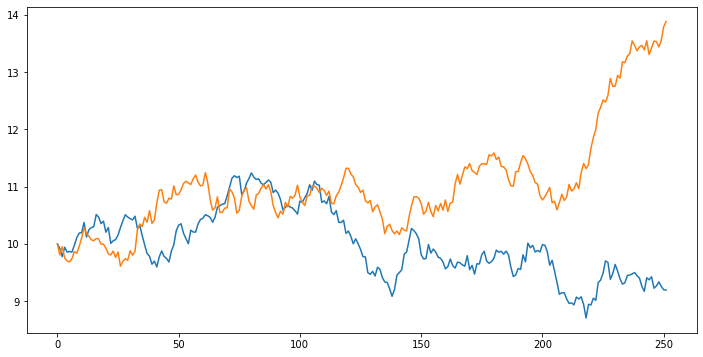

In [3]:
prices = assetPath(timeIncrements=251, nPaths=2)
plt.figure(1, figsize=(12,6))
plt.plot(prices)
plt.show()